# Survey Description

This notebooks lists and visualizes the answers to the open-question IAQ question.

* _Input:_ Cleaned .csv from Qualtrics with open description questions
* _Output:_ Exports graphs as .jpg

**Tasks:** 
* Lists all answers to open description question
* Plots a word cloud
* Does a simple sentiment analysis

## Metadata

* **Master**: Master Information Studies: Information Systems (track)
* **University**: University of Amsterdam (UvA)
* **Institute**: Informatics Institute
* **Faculty**: Faculty of Science (FNWI)
* **Research Group**: Digital Interactions Lab (DIL)
* **Student**: BSc Danny de Vries (14495643)
* **Supervisor**: Dr. H. (Hamed) Seiied Alavi PhD

[Viszlab](https://www.viszlab.github.io) © 2024 by [Danny de Vries](https://wwww.github.com/dandevri) is licensed under [CC BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1).

## Prequisites

This notebooks needs a sufficient Python version (>=3.6) to run and requires some packages and libraries for analysis and visualization. The following code checks if your installed Python version is compatible, installs the necessary packages and imports the packages into the notebook.

### Check Python installation

In [2]:
from packaging import version
import platform
import sys

min_version = '3.8'

def check_version(min_version):
    current_version = sys.version.split()[0]
    return version.parse(current_version) >= version.parse(min_version)

# Example usage:
if __name__ == "__main__":
    if check_version(min_version):
        print("Running a sufficiently new version of Python.")
        print("Current version: " + platform.python_version())
        print("Minimum required version: " + min_version)
    else:
        print("Python version is too old. Upgrade to a newer version.")

Running a sufficiently new version of Python.
Current version: 3.9.12
Minimum required version: 3.8


### Install the required packages

In [3]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install wordcloud

### Import the packages into the project

In [4]:
# External libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import os

### Load the clean csv

In [5]:
def import_csv(file):
    df = pd.read_csv(file)
    return df

file = 'survey-data/survey_data_clean.csv'

full_data = import_csv(file)

## Analysis of open question

### Air Quality description

**Q:** _Would you like to describe describe in more detail in your own words how you currently feel about the Indoor Air Quality?_


In [15]:
data = import_csv(file)

# Extract the 'Description' column
description_column = data['Description']

# Create a DataFrame from the 'Description' column, dropping rows with NaN values
description_df = pd.DataFrame(description_column.dropna(), columns=['Description'])

print(description_df)

                                         Description
1                there needs to be more ventilation 
5  I feel like I’m this building the air quiality...
7  I think it is good, although I must say that t...
8  Its really cold in here so the air seems cold ...


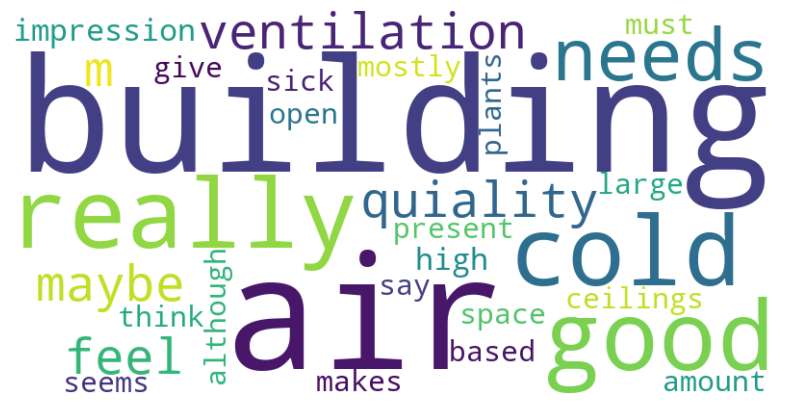

In [18]:
# Convert the 'Description' column to a single string
text = ' '.join(description_df['Description'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()